# Milan Kovacs
# 21308128
## Does age have a correlation on term deposit subscription?

# Importing libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

We will now load `bank.csv` file into the Notebook

In [19]:
data_frame = pd.read_csv('./bank.csv')

In [20]:
data_frame.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,46.0,self-employed,divorced,tertiary,no,926,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,34.0,blue-collar,married,secondary,no,1924,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,45.0,services,divorced,secondary,no,396,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,58.0,management,divorced,tertiary,no,315,yes,no,cellular,1,apr,121,2,135,2,failure,no
9,49.0,management,divorced,tertiary,no,20727,no,no,cellular,1,apr,285,3,132,2,failure,no


In [21]:
data_frame.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1990,36.0,technician,married,tertiary,no,376,no,no,cellular,16,sep,173,1,-1,0,NaN,yes
1991,39.0,admin.,divorced,secondary,no,112,no,no,cellular,16,sep,574,3,-1,0,NaN,yes
1992,78.0,retired,divorced,primary,no,527,no,no,cellular,16,sep,193,1,-1,0,NaN,yes
1993,35.0,management,married,NaN,no,2326,yes,yes,cellular,16,sep,319,1,-1,0,NaN,yes
1994,26.0,student,single,secondary,no,655,no,no,cellular,16,sep,190,1,-1,0,NaN,yes
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


Given the table above, we can identify the following:
| Column Name   |      Data Type |   Ord, or Nom   |  Sample values |
|----------|:--------------:|-------|------:|
| age      |  numerical | ordinal     | 32, 47, 58, null |
| job |    categorical | nominal   | technician, retired, blue-collar, null   |
| marital | categorical | nominal | single, married, divorced    |
| education | categorical | ordinal | tertiary, secondary, primary, null |
| default | categorical | nominal | yes, no |
| balance | numerical | ordinal | 392, 1035, -415 |
| housing | categorical | ordinal | yes, no |
| loan | categorical | nominal | yes, no |
| contact | categorical | ordinal | cellular, telephone, null | 
| day  | numerical | ordinal | 1, 2, 4, 5 |
| month | numerical | ordinal | apr, may, july | 
| duration | numerical | | 957, 126, 233 |
| campaign | numerical | ordinal | 1 - 11 |
| pdays | numerical | ordinal | -1, 233, 124 |
| previous | numerical | ordinal | 0 - 55 |
| poutcome | categorical | nominal | success, failure, other, null |
| subscribed | categorical | nominal | yes, no |

In the dataset we have 2,000 entries

In [22]:
data_frame.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


So we have 12 ages with `null` values,

<Axes: >

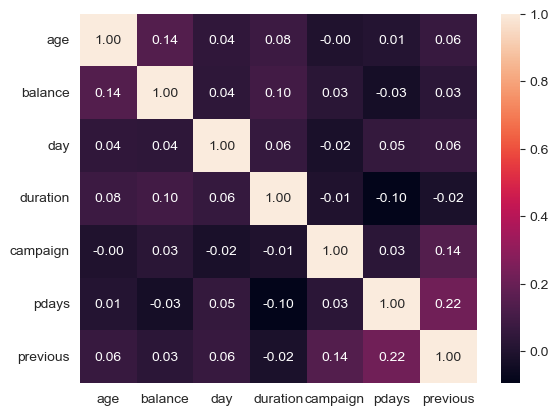

In [23]:
sns.heatmap(data_frame.corr(numeric_only=1), annot=True, fmt='.2f')

There is a weak positive correlation between balance and age. It may be worth considering this for future plotting, but we should now convert the categorical attributes into some value so we can see. 

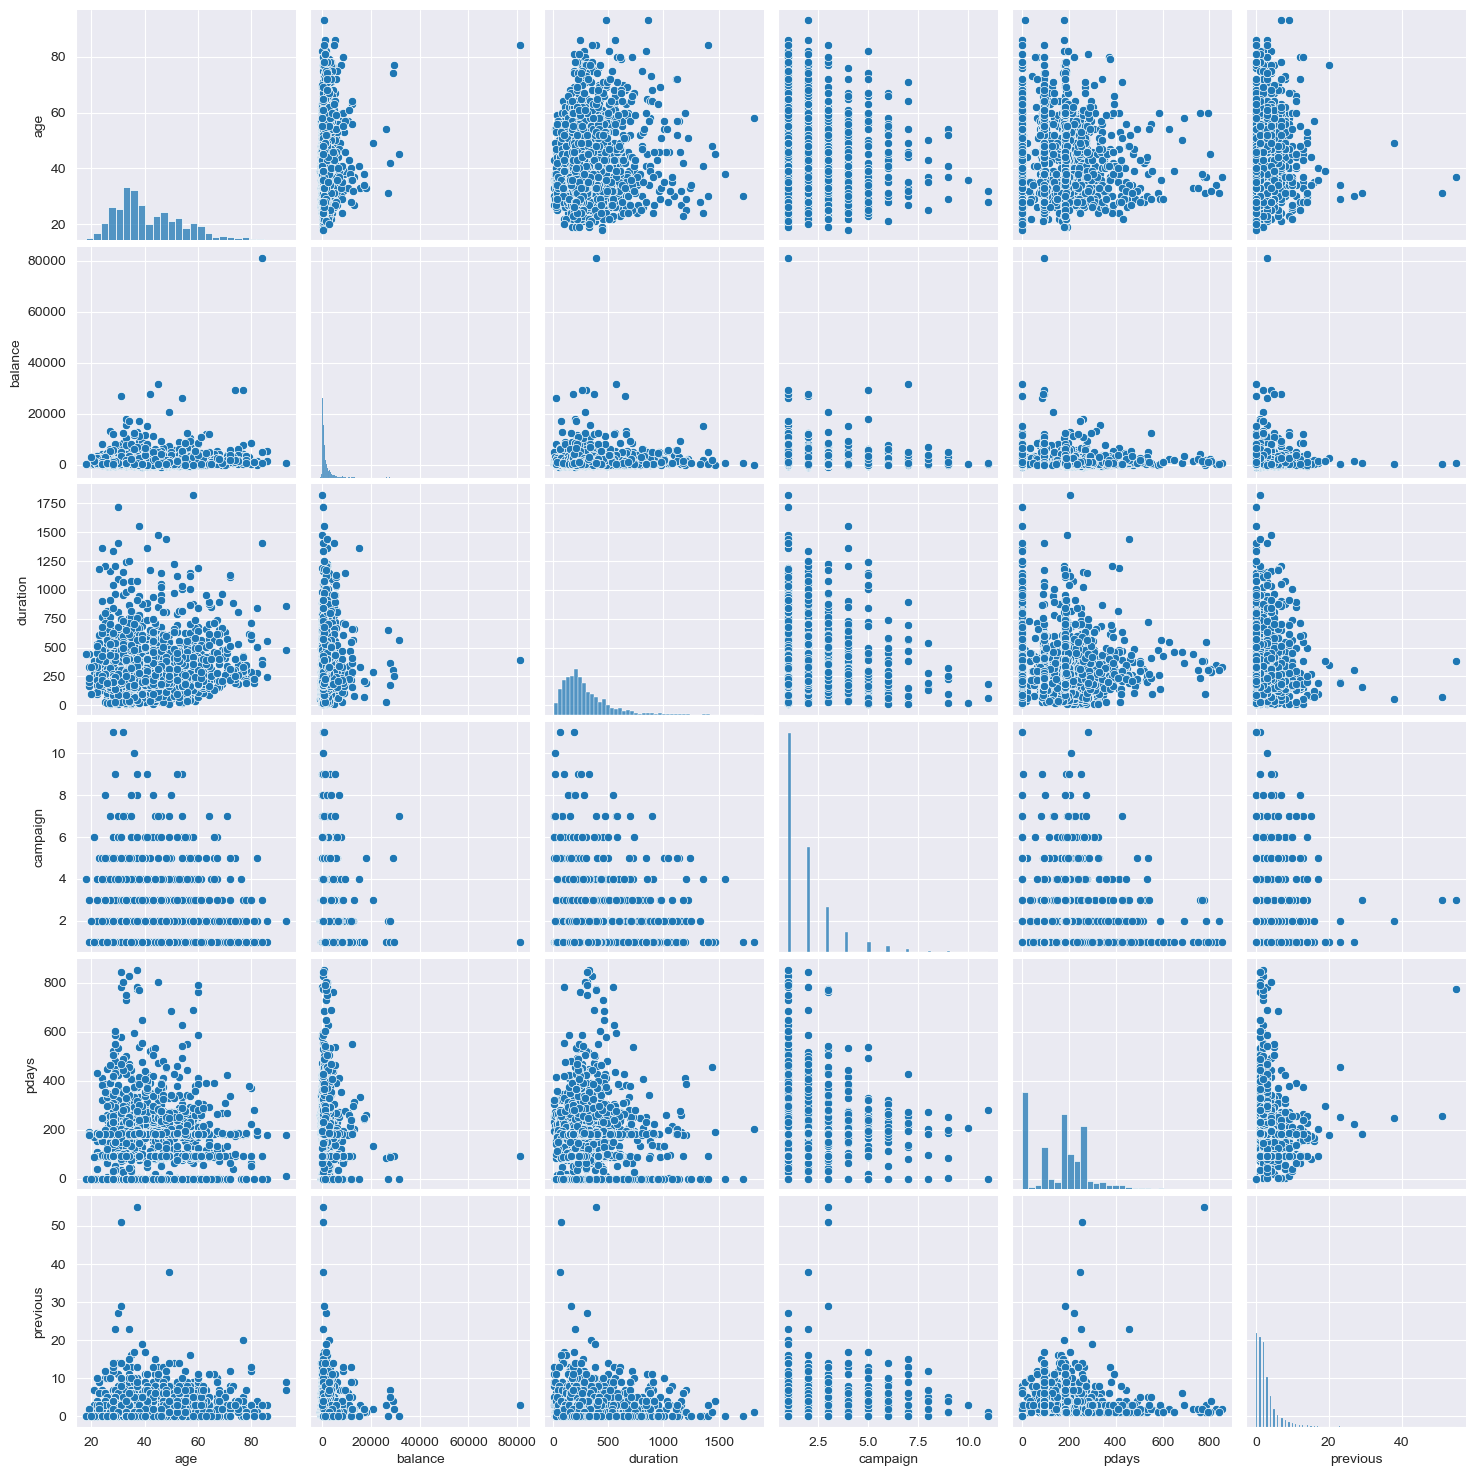

In [35]:
sns.pairplot(data=data_frame[[
    'age',
    'balance',
    'duration',
    'campaign',
    'pdays',
    'previous'
]].dropna())
plt.show()

# Histogram, boxplot, etc.

# Plotting correlation between categorical and numerical

In [25]:
data_frame['age'].value_counts()

age
33.0    95
35.0    90
31.0    87
34.0    84
32.0    77
        ..
86.0     2
73.0     2
81.0     2
79.0     1
18.0     1
Name: count, Length: 68, dtype: int64

In [26]:
data_frame['age'].count()

1988

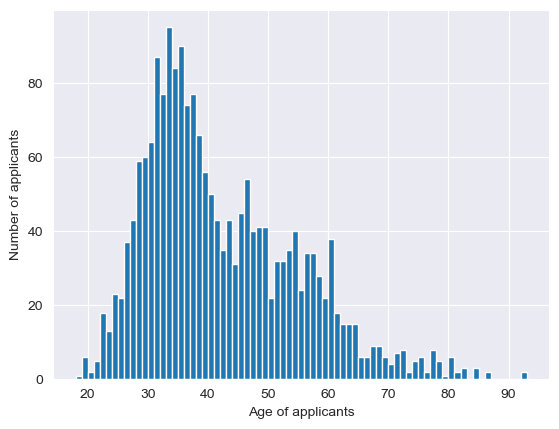

In [27]:
# Let's create two bar plots, for age against declined loans, and age against successful loans

data_frame['age'].hist(bins=(93 - 18))
plt.xlabel('Age of applicants')
plt.ylabel('Number of applicants')
plt.show()

Let's compare 

In [28]:
data_frame['subscribed'].value_counts()

subscribed
no     1000
yes    1000
Name: count, dtype: int64

In [29]:
data_frame['subscribed'].count()

2000

<Axes: >

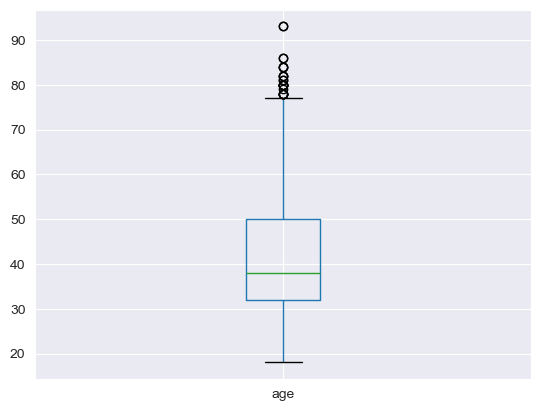

In [30]:
data_frame.boxplot(column='age')

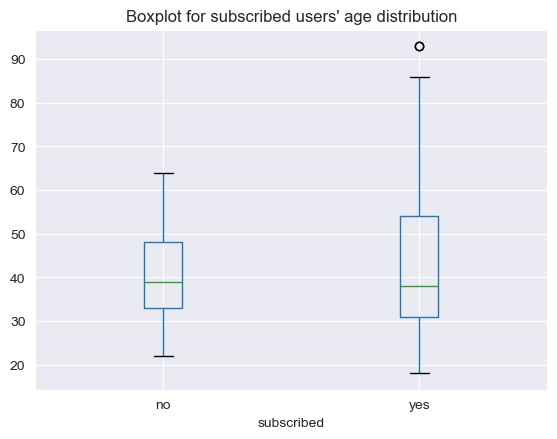

In [34]:
data_frame.boxplot(column='age', by='subscribed')
plt.title('Boxplot for subscribed users\' age distribution')
plt.suptitle("")
plt.show()

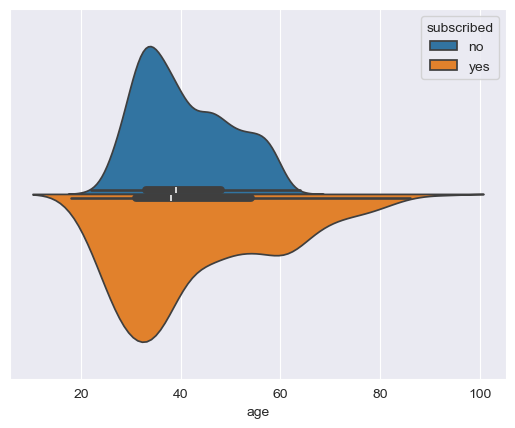

In [44]:
sns.violinplot(data=data_frame, x='age', hue='subscribed', split=True)
plt.show()

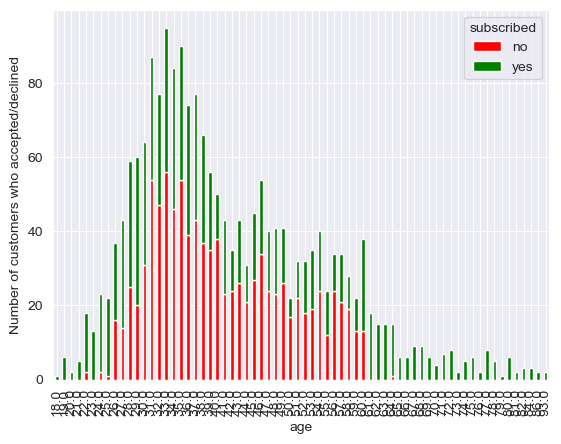

In [51]:
crosstab_CL = pd.crosstab(data_frame['age'], data_frame['subscribed'])
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.ylabel('Number of customers who accepted/declined')
plt.show()

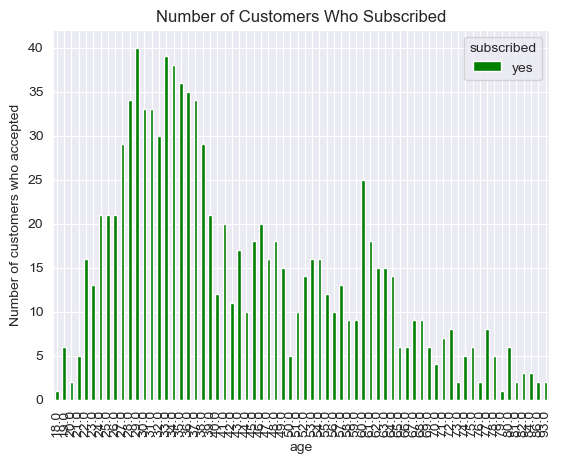

In [52]:
crosstab_CL = pd.crosstab(data_frame['age'], data_frame['subscribed'])
crosstab_CL = crosstab_CL[['yes']]

crosstab_CL.plot(kind='bar', stacked=True, color='green') 
plt.ylabel('Number of customers who accepted')
plt.title('Number of Customers Who Subscribed')
plt.show()

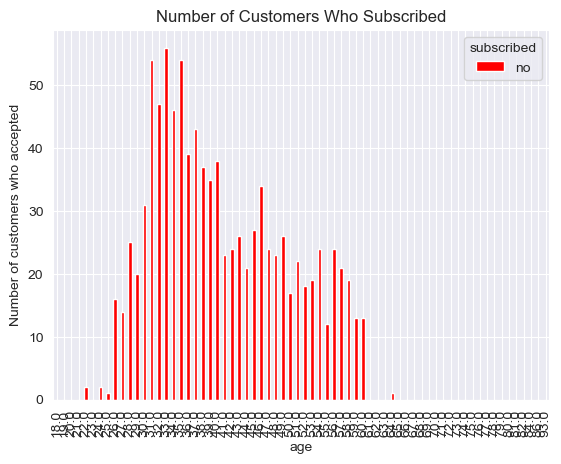

In [54]:
crosstab_CL = pd.crosstab(data_frame['age'], data_frame['subscribed'])
crosstab_CL = crosstab_CL[['no']]

crosstab_CL.plot(kind='bar', stacked=True, color='red') 
plt.ylabel('Number of customers who accepted')
plt.title('Number of Customers Who Subscribed')
plt.show()